In [1]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.metrics import calinski_harabasz_score
%matplotlib inline
plt.style.use('seaborn')

In [2]:
#fantasypros 0.5 ppr rb proj w9
data = {'Player':['J.Taylor','A.Kamara','D.Cook','A.Jones','A.Ekeler','N.Harris','E.Elliot','D.Henderson','N.Chubb','J.Mixon',
                 'D.Harris','E.Mitchell','C.Patterson','M.Carter','C.Hubbard','C.Edmonds','K.Herbert','Z.Moss','D.Williams',
                 'D.Booker','M.Gordon','M.Gaskin','J.Conner','B.Scott','Jav.Williams','J.Robinson','J.Jacobs','T.Pollard',
                 'D.Singletary','A.Dillion','J.McNichols','M.Davis','C.Hyde','N.Hines','Dav.Johnson','D\'er.Johnson', 
                 'K.Gainwell','T.Johnson','S.Perine','M.Ingram'],'Proj':[20.1,19.6,17.1,17.0,16.9,16.6,16.3,16.2,16.0,15.3,
                                                                        14.9,14.8,14.5,13.3,12.6,12.6,12.2,12.1,12.0,12.0,
                                                                        11.6,11.6,10.5,10.2,9.6,9.0,8.7,8.6,8.5,8.2,
                                                                         8.1,7.4,7.3,7.2,6.9,6.7,6.5,6.5,6.5,6.0]}
df = pd.DataFrame(data)
df['Rank']=df.index+1
df.set_index('Player', inplace=True)
reordered_df = df[['Rank','Proj']]
reordered_df.head()

,Rank,Proj
Player,,
J.Taylor,1,20.1
A.Kamara,2,19.6
D.Cook,3,17.1
A.Jones,4,17.0
A.Ekeler,5,16.9


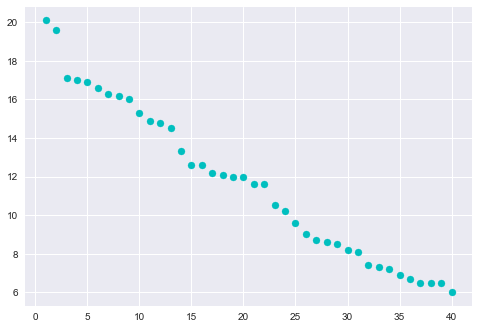

In [3]:
fig, ax = plt.subplots()
ax.scatter(df['Rank'], df['Proj'],c='c');

In [4]:
model = KMeans(n_clusters=6,random_state=42).fit(reordered_df)

In [5]:
model.cluster_centers_

array([[23.5       , 10.41666667],
       [10.        , 15.42857143],
       [36.5       ,  6.7       ],
       [ 3.5       , 17.88333333],
       [17.        , 12.4       ],
       [29.5       ,  8.25      ]])

In [6]:
predicted_clusters = model.predict(reordered_df)

In [7]:
predicted_clusters

array([3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 4, 4, 4, 4, 4, 4, 4, 0, 0,
       0, 0, 0, 0, 5, 5, 5, 5, 5, 5, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
pre_labeled_df = reordered_df.reset_index()

In [9]:
labeled_df = pd.concat([pre_labeled_df, pd.DataFrame(model.labels_,
                        columns=['Tiers'])], axis=1)
labeled_df['Tiers'].replace({3:1,1:2,4:3,0:4,2:6}, inplace=True)
labeled_df.head()

,Player,Rank,Proj,Tiers
0,J.Taylor,1,20.1,1
1,A.Kamara,2,19.6,1
2,D.Cook,3,17.1,1
3,A.Jones,4,17.0,1
4,A.Ekeler,5,16.9,1


In [10]:
pred_tiers = np.array(labeled_df['Tiers'])

In [11]:
X=reordered_df['Rank']
y=reordered_df['Proj']

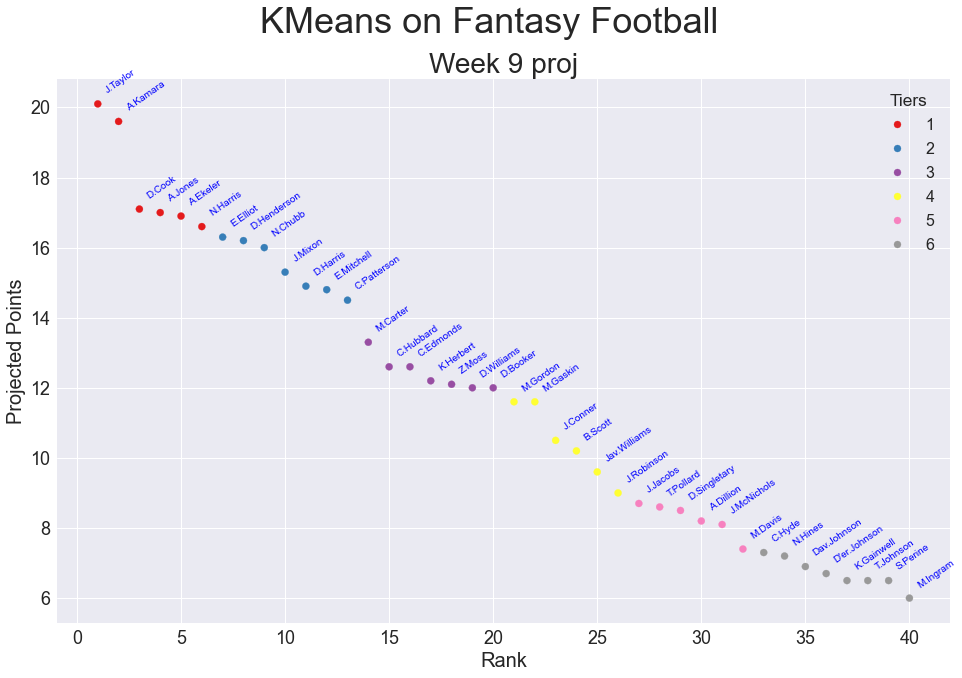

In [12]:
plt.figure(figsize=(16,10))
sc = plt.scatter(X, y, c=pred_tiers,s=50,cmap='Set1')
plt.suptitle('KMeans on Fantasy Football', fontsize=36)
plt.title('Week 9 proj', fontsize=28);
plt.xlabel('Rank',fontsize=20)
plt.ylabel('Projected Points',fontsize=20)
plt.tick_params(axis="x", labelsize=18)
plt.tick_params(axis="y", labelsize=18)
for i in range(reordered_df.shape[0]):
    plt.text(x=reordered_df.Rank[i]+0.3,y=reordered_df.Proj[i]+0.3,s=df.index[i], 
          fontdict=dict(color='blue',size=10),rotation=35)
plt.legend(*sc.legend_elements(), title='Tiers', fontsize=16, title_fontsize='xx-large');

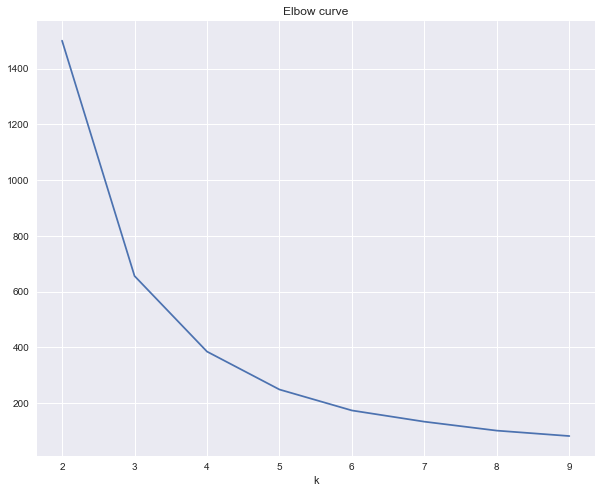

In [13]:
# Specifying the dataset and initializing variables
X = reordered_df
distortions = []

# Calculate SSE for different K
for k in range(2, 10):
    kmeans = KMeans(n_clusters=k, random_state=301)
    kmeans.fit(X)
    distortions.append(kmeans.inertia_)

# Plot values of SSE
fig, ax = plt.subplots(figsize=(10, 8))
ax.set_title('Elbow curve')
ax.set_xlabel('k')
ax.plot(range(2, 10), distortions)
ax.grid(True)